In [8]:
# Comentar de esta parte en caso de no usar "Google Colab"
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
# Comentar de esta parte en caso de no usar "Google Colab"
# Se añade la librería "fuzzy", copiando el fichero previamente
# Si existen errores posteriormente -> "Reiniciar entorno de ejecución"
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/U2 :: Lógica difusa')

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#
# Función singleton(x, x0): función de pertenencia singleton.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   x0: valor de referencia.
# Retorna:
#   singleton(x, x0): float, si x es int, float.
#   singleton(x, x0): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def singleton(x, x0):
    if (type(x) is int) or (type(x) is float) or (type(x) is np.float64):
    # Si X es entero o real evalua para el valor entrante.
        if x == x0:
            m = 1.0
        else:
            m = 0.0
        return m
    elif (type(x) is numpy.ndarray):
    # Si es un arreglo, evalua para todos sus elementos.
        m = np.zeros(x.size)
        for i in range(x.size):
            if x[i] == x0:
                m[i] = 1.0
            else:
                m[i] = 0.0
        return m
    else:
        return -1
    
#
# Función trimf(x, param): función de pertenencia triangular.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [a, b, c]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse a <= b <= c
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   trimf(x, param): float, si x es int, float.
#   trimf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def trimf(x, param):
    # param = [a, b, c]
    # a <= b <= c
    a = float(param[0])
    b = float(param[1])
    c = float(param[2])
    if (a <= b) and (b <= c):
        if (type(x) is int) or (type(x) is float) or (type(x) is np.float64):     
            if x <= a:
                m = 0.0
            elif (a <= x) and (x <= b):
                m = (x - a)/(b - a)   
            elif (b <= x) and (x <= c):
                m = (c - x)/(c - b)  
            else:
                m = 0.0 
            return m
        else: 
            m = np.zeros(x.size)
            for i in range(x.size):
                if x[i] <= a:
                    m[i] = 0.0
                elif (a <= x[i]) and (x[i] <= b):
                    m[i] = (x[i] - a)/(b - a)   
                elif (b <= x[i]) and (x[i] <= c):
                    m[i] = (c - x[i])/(c - b)  
                else:
                    m[i] = 0.0
        return m
    else:
        return -1

#
# Función trapmf(x, [a, b, c, d]): función de pertenencia trapezoidal.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   [a, b, c, d]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse a <= b <= c <= d
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   trapmf(x, param): float, si x es int, float.
#   trapmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def trapmf(x, param):
    # param = [a, b, c, d]
    # a <= b <= c <=d
    a = float(param[0])
    b = float(param[1])
    c = float(param[2])
    d = float(param[3])
    if (a <= b) and (b <= c) and (c <= d):
        if (type(x) is int) or (type(x) is float) or (type(x) is np.float64):    
            if x < a:
                m = 0.0
            elif (a <= x) and (x < b):
                m = (x - a)/(b - a)   
            elif (b <= x) and (x <= c):
                m = 1.0  
            elif (c < x) and (x <= d):
                m = (d - x)/(d - c)  
            else:
                m = 0.0
            return m
        else: 
            m = np.zeros(x.size)
            for i in range(x.size):
                if x[i] < a:
                    m[i] = 0.0
                elif (a <= x[i]) and (x[i] < b):
                    m[i] = (x[i] - a)/(b - a)   
                elif (b <= x[i]) and (x[i] <= c):
                    m[i] = 1.0
                elif (c < x[i]) and (x[i] <= d):
                    m[i] = (d - x[i])/(d - c)  
                else:
                    m[i] = 0.0
            return m
    else:
        return -1

#
# Función gaussmf(x, param): función de pertenencia gaussiana.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [sig, x0]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse sig > 0
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   gaussmf(x, param): float, si x es int, float.
#   gaussmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def gaussmf(x, param):
    #param = [sig, x0]
    # sig > 0
    sig = param[0]
    x0 = param[1]
    if (sig > 0):
        if (type(x) is int) or (type(x) is float) or (type(x) is np.float64):     
            m = np.exp(-0.5*((x - x0)/sig)**2)
        else: 
            m = np.zeros(x.size)
            for i in range(x.size):
                m[i] = np.exp(-0.5*((x[i] - x0)/sig)**2)
        return m
    else:
        return -1

#
# Función gbellmf(x, param): función de pertenencia campana generalizada.
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [a, b, x0]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse a, b > 0
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   gbellmf(x, param): float, si x es int, float.
#   gbellmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def gbellmf(x, param):
    # param = [a, b, x0]
    # a, b > 0
    a = param[0]
    b = param[1]
    x0 = param[2]
    if (a > 0) and (b > 0):
        if (type(x) is int) or (type(x) is float):     
            m = 1/(1+(abs((x - x0)/a)**(2*b)))
        else: 
            m = np.zeros(x.size)
            for i in range(x.size):
                m[i] = 1/(1+(abs((x[i] - x0)/a)**(2*b)))
        return m
    else:
        return -1

#
# Función sigmf(): función de pertenencia sigmoidal.
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [a, x0]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   sigmf(x, param): numpy.float, si x es int, float.
#   sigmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def sigmf(x, param):
    # param = [a, x0]
    a = param[0]
    x0 = param[1]
    if (type(x) is int) or (type(x) is float) or (type(x) is np.float64):    
        m = 1/(1+np.exp(-a*(x - x0)))
    else: 
        m = np.zeros(x.size)
        for i in range(x.size):
            m[i] = 1/(1+np.exp(-a*(x[i] - x0)))
    return m

#
# Función cartesian(): Relación cartesiana difusa.
# Argumentos:
#   mA: numpy.ndarray, Vector con valores de pertenencia de xA
#   mB: numpy.ndarray, Vector con valores de pertenencia de xB
# Retorna:
#   AxB: Matriz de relación (mínimo)
#
def cartesian(mA, mB):
    AxB = np.zeros([mA.size, mB.size])
    for i in range(mA.size):
        for j in range(mB.size):
            AxB[i, j] = min(mA[i], mB[j])
    return AxB

#
# Función compose(): Composición difusa max-min.
# Argumentos:
#   mRA: numpy.ndarray, vector o matriz de relación A
#   mRB: numpy.ndarray, Matriz de relación B
# Retorna:
#   AoB: Matriz de composición max-min
#
def compose(mRA, mRB):   
    
    if mRA.ndim == 1:
        aux = np.zeros(mRA.size)
        AoB = np.zeros(mRB.shape[0])
        
        for j in range(mRA.size):
            for i in range(mRB.shape[0]):
                aux[i] = min(mRA[i], mRB[i,j])
            AoB[j] = max(aux) 
        
    else:
        if (mRA.shape[1] != mRB.shape[0]):
            return -1
        else:
            aux = np.zeros(mRA.shape[1])
            AoB = np.zeros([mRA.shape[0], mRB.shape[1]])

            for i in range(mRA.shape[0]):
                for k in range(mRB.shape[1]):
                    for j in range(mRA.shape[1]):
                        aux[j] = min(mRA[i,j],mRB[j,k])

                    AoB[i, k] = max(aux)
    return AoB

#
# Función Tmin(): Norma T
# Argumentos:
#   mA: numpy.ndarray, Vector con valores de pertenencia de xA
#   mB: numpy.ndarray, Vector con valores de pertenencia de xB
# Retorna:
#   Tmin: Norma T (mínimo)
#
def Tmin(mA, mB):
    Tmin = np.zeros([mA.size])
    for i in range(mA.size):
        Tmin[i] = min(mA[i], mB[i])
    return Tmin

#
# Función Smax(): Norma S
# Argumentos:
#   mA: numpy.ndarray, Vector con valores de pertenencia de xA
#   mB: numpy.ndarray, Vector con valores de pertenencia de xB
# Retorna:
#   Tmin: Norma S (máximo)
#
def Smax(mA, mB):
    Smax = np.zeros([mA.size])
    for i in range(mA.size):
        Smax[i] = max(mA[i], mB[i])
    return Smax

#
# Función Nc(): Complemento
# Argumentos:
#   mA: numpy.ndarray, Vector con valores de pertenencia de xA
# Retorna:
#   Nc: Complemento
#
def Nc(mA):
    Nc = np.zeros([mA.size])
    for i in range(mA.size):
        Nc[i] = 1 - mA[i]
    return Nc

#
# Función cut(): cortar
# Argumentos:
#   mf: numpy.ndarray
#   value: Int, Float, valor de corte
# Retorna:
#   numpy.ndarray: función cortada
#
def cut(value, mf):
    value = float(value)
    aux = np.zeros(mf.size)
    if (type(value) is int) or (type(value) is float):
        for i in range(mf.size):
            aux[i] = min(value, mf[i])
        return aux
    else:
        return -1

    
#
# Función union(): Unión de funciones de membresía por método max
# Argumentos:
#   data: arreglo de elementos numpy.ndarray, todos de igual dimensión
# Retorna:
#   numpy.ndarray: unión de las funciones
#
def union(data):
    aux = np.zeros(data[0].size)
    for j in range(len(data)):
        for i in range(aux.size):
            aux[i] = max(aux[i], data[j][i])
    return aux

#
# Función fuzz(): fuzzificación
# Argumentos:
#   x0: Int, Float, valor de entrada
#   y: numpy.ndarray, universo de discurso de salida
#   mA_list: arreglo de reglas de entrada
#   mB_list: arreglo de reglas de salida
# Retorna:
#   numpy.ndarray
def fuzz(x0, y, mA_list, mB_list):
    A0 = np.zeros(len(mA_list))
    Bi = np.zeros([y.size, len(mA_list)])
    out = np.zeros(y.size)
    for i in range(len(mA_list)):
        fA = mA_list[i][0]
        param_A = mA_list[i][1]
        A0[i] = fA(float(x0), param_A)
        fB = mB_list[i][0]
        param_B = mB_list[i][1]
        for j in range(y.size):
            Bi[j,i] = min(A0[i], fB(float(y[j]), param_B))
            out[j] = max(Bi[j,:])
    return(out)


#
# Función defuzz(): Defuzzificación
# Argumentos:
#   y: numpy.ndarray, universo de discurso de salida
#   mf: función resultante del proceso de fuzzificación
#   option: String, método de defuzzificación
# Retorna:
#   Float: valor de salida
def defuzz(y, mf, option):
    if option == 'centroid':
        num = 0
        den = 0
        for i in range(y.size):
            num = num + y[i]*mf[i]
            den = den + mf[i]
        y0 = num/den
        return y0
    
    elif option == 'bisector':
        area = 0
        aux = 0
        for i in range(y.size - 1):
            area = area + (y[i+1] - y[i]) * ((mf[i+1] + mf[i])/2)
        for i in range(y.size):
            aux = aux + (y[i+1] - y[i]) * ((mf[i+1] + mf[i])/2)
            if (aux >= area/2):
                return y[i]
        
    elif option == 'MOM':
        mf_max = max(mf)
        acum = 0
        n = 0
        for i in range(y.size):
            if (mf[i] == mf_max):
                acum = acum + y[i]
                n = n + 1
        return acum/n

    elif option == 'SOM':
        mf_max = max(mf)
        for i in range(y.size):
            if (mf[i] == mf_max):
                return y[i]
        
    elif option == 'LOM':
        mf_max = max(mf)
        for i in range(y.size):
            if (mf[y.size - i -1] == mf_max):
                return y[y.size - i -1]
            
    else:
        return -1
    



In [2]:
# Rango de la calidad de la comida
x_cal = np.arange(0, 11, 1)

# Rango de la calidad del servicio
x_serv = np.arange(0, 11, 1)

# Rango del porcentaje de propina (del 5% al 25%)
x_prop = np.arange(5, 26, 1)


<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:58: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:58: SyntaxWarning: invalid escape sequence '\m'
C:\Users\alanm\AppData\Local\Temp\ipykernel_6188\841277509.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mu (x)$')
C:\Users\alanm\AppData\Local\Temp\ipykernel_6188\841277509.py:39: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mu (x)$')
C:\Users\alanm\AppData\Local\Temp\ipykernel_6188\841277509.py:58: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mu (x)$')


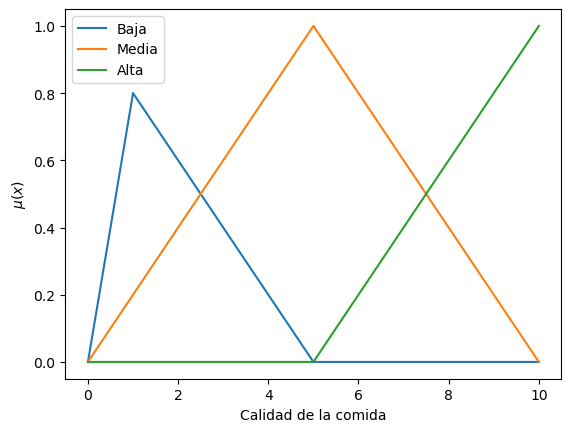

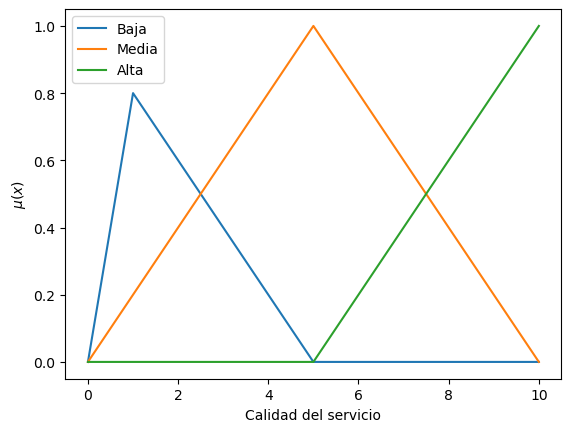

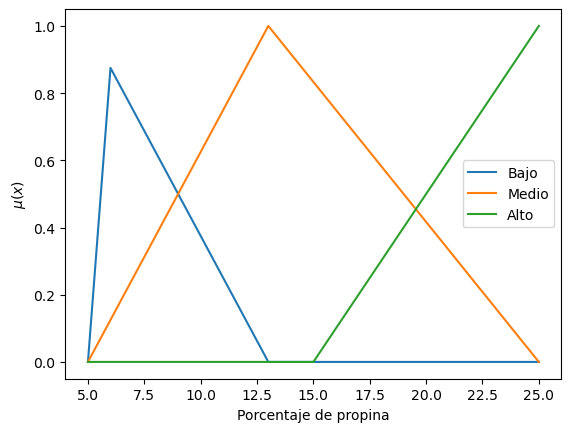

In [3]:
# CALIDAD DE LA COMIDA

# Calidad mala (0/0, 0/1, 5/0)
cal_b = trimf(x_cal, [0, 0, 5])

# Calidad media (0/0, 5/1, 10/0)
cal_m = trimf(x_cal, [0, 5, 10])

# Calidad alta (5/0, 10/1, 10/0)
cal_a = trimf(x_cal, [5, 10, 10])

# Representación gráfica
plt.plot(x_cal, cal_b, label="Baja")
plt.plot(x_cal, cal_m, label="Media")
plt.plot(x_cal, cal_a, label="Alta")
plt.legend(loc='best')
plt.xlabel('Calidad de la comida')
plt.ylabel('$\mu (x)$')
plt.show()


# CALIDAD DEL SERVICIO

# Calidad baja (0/0, 0/1, 5/0)
serv_b = trimf(x_serv, [0, 0, 5])

# Calidad media (0/0, 5/1, 10/0)
serv_m = trimf(x_serv, [0, 5, 10])

# Calidad alta (5/0, 10/1, 10/0)
serv_a = trimf(x_serv, [5, 10, 10])

# Representación gráfica
plt.plot(x_serv, serv_b, label="Baja")
plt.plot(x_serv, serv_m, label="Media")
plt.plot(x_serv, serv_a, label="Alta")
plt.legend(loc='best')
plt.xlabel('Calidad del servicio')
plt.ylabel('$\mu (x)$')
plt.show()

# PORCENTAJE DE LA PROPINA

# Porcentaje bajo (5/0, 5/1, 13/0)
prop_b = trimf(x_prop, [5, 5, 13]) # —- 5-1 13-0 \

# Porcentaje medio (5/0, 13/1, 25/0)
prop_m = trimf(x_prop, [5, 13, 25]) # 5-0 13-1 25-0 /\

# Porcentaje alto (13/0, 25/1, 25/0)
prop_a = trimf(x_prop, [15, 25, 25]) # 13-0 25-1 —- /

plt.plot(x_prop, prop_b, label="Bajo")
plt.plot(x_prop, prop_m, label="Medio")
plt.plot(x_prop, prop_a, label="Alto")
plt.legend(loc='right')
plt.xlabel('Porcentaje de propina')
plt.ylabel('$\mu (x)$')
plt.show()


Calidad comida baja: 0.0
Calidad comida media: 0.2
Calidad comida alta: 0.8


<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:46: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:46: SyntaxWarning: invalid escape sequence '\m'
C:\Users\alanm\AppData\Local\Temp\ipykernel_6188\3215306006.py:24: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mu (x)$')
C:\Users\alanm\AppData\Local\Temp\ipykernel_6188\3215306006.py:46: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mu (x)$')


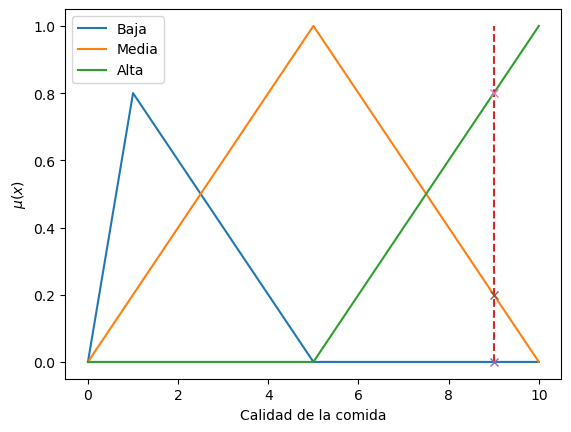


Servicio bajo: 0.0
Servicio aceptable: 0.2
Servicio alta: 0.8


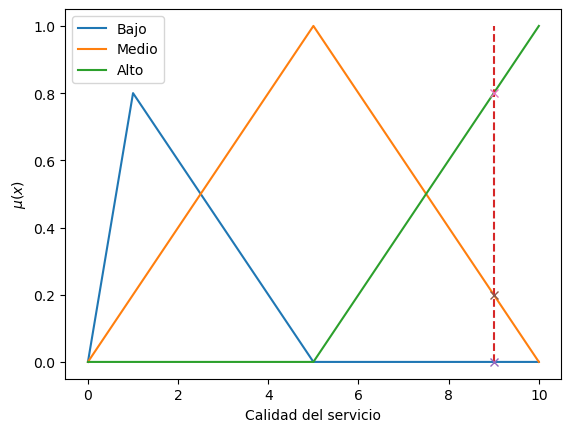

In [4]:
# Introducimos valores para las variables de entrada
cal_comida = 9
cal_servicio = 9

# Calculamos el grado de membresía de cierto valor de entrada para las variables 'calidad de comida' y 'calidad del servicio'

cal_nivel_b = trimf(cal_comida, [0, 0, 5])
cal_nivel_m = trimf(cal_comida, [0, 5, 10])
cal_nivel_a = trimf(cal_comida, [5, 10, 10])

print("Calidad comida baja:", cal_nivel_b)
print("Calidad comida media:", cal_nivel_m)
print("Calidad comida alta:", cal_nivel_a)

plt.plot(x_cal, cal_b, label="Baja")
plt.plot(x_cal, cal_m, label="Media")
plt.plot(x_cal, cal_a, label="Alta")
plt.plot([cal_comida, cal_comida], [0.0, 1.0], linestyle="--")
plt.plot(cal_comida, cal_nivel_b, 'x')
plt.plot(cal_comida, cal_nivel_m, 'x')
plt.plot(cal_comida, cal_nivel_a, 'x')
plt.legend(loc='best')
plt.xlabel('Calidad de la comida')
plt.ylabel('$\mu (x)$')
plt.show()


serv_nivel_b = trimf(cal_servicio, [0, 0, 5])
serv_nivel_m = trimf(cal_servicio, [0, 5, 10])
serv_nivel_a = trimf(cal_servicio, [5, 10, 10])


print("\nServicio bajo:", serv_nivel_b)
print("Servicio aceptable:", serv_nivel_m)
print("Servicio alta:", serv_nivel_a)

plt.plot(x_serv, serv_b, label="Bajo")
plt.plot(x_serv, serv_m, label="Medio")
plt.plot(x_serv, serv_a, label="Alto")
plt.plot([cal_servicio, cal_servicio], [0.0, 1.0], linestyle="--")
plt.plot(cal_servicio, serv_nivel_b, 'x')
plt.plot(cal_servicio, serv_nivel_m, 'x')
plt.plot(cal_servicio, serv_nivel_a, 'x')
plt.legend(loc='best')
plt.xlabel('Calidad del servicio')
plt.ylabel('$\mu (x)$')
plt.show()

In [5]:
# FUSIFICACIÓN

# Definición de reglas

# REGLA 1: "Si la calidad de la comida está baja o la de calidad del servicio es bajo entonces la propina es baja"
antecedente_1 = max(cal_nivel_b, serv_nivel_b)
regla_1 = cut(antecedente_1, prop_b)

# REGLA 2: "Si la calidad del servicio es aceptable entonces la propina es media"
regla_2 = cut(serv_nivel_m, prop_m)

# REGLA 3: "Si la calidad de la comida es alta o la calidad del servicio es alta, entonces la propina es alta"
antecedente_3 = max(cal_nivel_a, serv_nivel_a)
regla_3 = cut(antecedente_3, prop_a)

# Se hace la unión de los conjuntos resultantes de la aplicación de reglas
agregacion = union([regla_1, regla_2, regla_3])
print(agregacion)

[0.    0.125 0.2   0.2   0.2   0.2   0.2   0.2   0.2   0.2   0.2   0.2
 0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.8   0.8  ]


In [6]:
# Defusificación usando el método del centroide
propina = defuzz(x_prop, agregacion, 'centroid')

print(f"Para una calidad de comida de {cal_comida}/10 y una calidad de servicio de {cal_servicio}/10,")
print(f"la propina recomendada es de {propina:.2f}%")

Para una calidad de comida de 9/10 y una calidad de servicio de 9/10,
la propina recomendada es de 18.79%


In [7]:
# Defusificación usando el método LOM
propina = defuzz(x_prop, agregacion, 'LOM')

print(f"Para una calidad de comida de {cal_comida}/10 y una calidad de servicio de {cal_servicio}/10,")
print(f"la propina recomendada es de {propina:.2f}%")

Para una calidad de comida de 9/10 y una calidad de servicio de 9/10,
la propina recomendada es de 25.00%
